<a href="https://colab.research.google.com/github/drewwint/cog_ctrl_comp_sssst/blob/main/cog_ctrl_comp_network_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(probabilistic_networks)=
# Creating and manipulating networks of probabilistic nodes

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ComputationalPsychiatry/pyhgf/blob/master/docs/source/notebooks/0.2-Creating_networks.ipynb)

In [1]:
import sys
from IPython.utils import io
if 'google.colab' in sys.modules:

  with io.capture_output() as captured:
      ! pip install pyhgf watermark

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyhgf.model import Network, HGF
from pyhgf.typing import AdjacencyLists

plt.rcParams["figure.constrained_layout.use"] = True

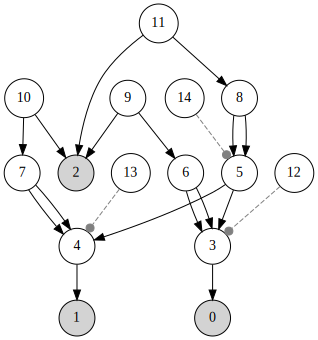

In [3]:
ssst_hgf_control_decision_model = (
    Network()
    .add_nodes(n_nodes=2)  # Node 0: cognitive capacity, Node 1: cognitive control                #0 and #1

    # Add Trial Type Node
    .add_nodes(n_nodes=1)  # Node 2: Trial Type (Passive = 0, Go = 1, Selective = 2)                     #2

    # latent states of input nodes
    .add_nodes(value_children=[0])    # Node 0 latent state of resourse availability                     #3
    .add_nodes(value_children=[1])  # Node 1 latent state of cognitive load                         #4

    # coupling between latent states
    .add_nodes(value_children=[3, 4])  # Node 0 influenced by Node 1 (decision to allocate control)      #5

    # autoregressive terms on latent states
    .add_nodes(value_children=[3,3]) # prior resources influencing current resources                     #6
    .add_nodes(value_children=[4,4]) # prior cognitive load influencing current cognitive load           #7
    .add_nodes(value_children=[5,5]) # prior decision to allocate control influencing current decision   #8

    # Add Influence of Trial Type on Cognitive Load, resources, and decision from prior to current trial
    .add_nodes(value_children=[6, 2])  # Node 7 influenced by Node 2 (Trial Type)                        #9
    .add_nodes(value_children=[7, 2])  # Node 8 influenced by Node 2 (Trial Type)                        #10
    .add_nodes(value_children=[8, 2])  # Node 9 influenced by Node 2 (Trial Type)                        #11

    # Volatility in Cognitive Load,
    .add_nodes(volatility_children=[3]) # Node 3 Volatility in resources                                 #11
    .add_nodes(volatility_children=[4]) # Node 4 Volatility in Cognitive Load                            #12
    .add_nodes(volatility_children=[5]) # Node 5 uncertainty in decision to allocate control             #13

)

ssst_hgf_control_decision_model.plot_network()



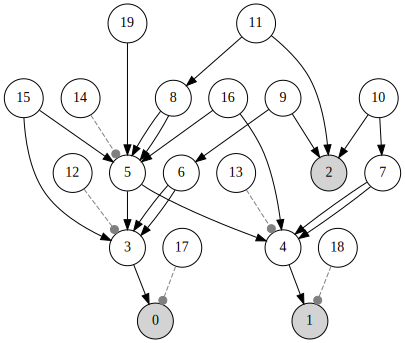

In [4]:
ssst_hgf_control_decision_model = (
    Network()
    .add_nodes(n_nodes=2)  # Node 0: cognitive capacity, Node 1: cognitive load

    # Trial Type Node
    .add_nodes(n_nodes=1)  # Node 2: Trial Type (0 = Passive, 1 = Go, 2 = Select)

    # Latent states of resource availability and cognitive load
    .add_nodes(value_children=[0])  # Node 3: Latent Resource Availability
    .add_nodes(value_children=[1])  # Node 4: Latent Cognitive Load

    # Decision to allocate control
    .add_nodes(value_children=[3, 4])  # Node 5: Decision to allocate control

    # Autoregressive updates (memory effects)
    .add_nodes(value_children=[3,3])  # Node 6: Prior Resources → Current Resources
    .add_nodes(value_children=[4,4])  # Node 7: Prior Load → Current Load
    .add_nodes(value_children=[5,5])  # Node 8: Prior Control Decision → Current Decision

    # Influence of Trial Type
    .add_nodes(value_children=[6, 2])  # Node 9: Trial Type → Resource Availability
    .add_nodes(value_children=[7, 2])  # Node 10: Trial Type → Cognitive Load
    .add_nodes(value_children=[8, 2])  # Node 11: Trial Type → Decision to Allocate Control

    # Volatility terms for dynamic updates
    .add_nodes(volatility_children=[3])  # Node 12: Resource Availability Volatility
    .add_nodes(volatility_children=[4])  # Node 13: Cognitive Load Volatility
    .add_nodes(volatility_children=[5])  # Node 14: Decision Uncertainty

    # NEW: Control Allocation Influences Future Resource Availability and Load
    .add_nodes(value_children=[3, 5])  # Node 15: Control Allocation → Future Resources
    .add_nodes(value_children=[4, 5])  # Node 16: Control Allocation → Future Cognitive Load

    # Uncertainty for Measured Inputs
    .add_nodes(volatility_children=[0])  # Node 17: Observation Noise in Cognitive Capacity
    .add_nodes(volatility_children=[1])  # Node 18: Observation Noise in Cognitive Load

    # Bias Toward/Against Control Allocation
    .add_nodes(value_children=[5])  # Node 19: Bias in Control Allocation

#     # New Node for Successful Control Allocation
# .add_nodes(value_children=[5])  # Node 20: Successful Control Allocation (Influenced by Decision)
# .add_nodes(value_children=[20, 0])  # Node 21: Resources Influence Success
# .add_nodes(value_children=[20, 1])  # Node 22: Cognitive Load Influences Success
# .add_nodes(value_children=[20, 2])  # Node 23: Trial Type Influences Success
)
ssst_hgf_control_decision_model.plot_network()

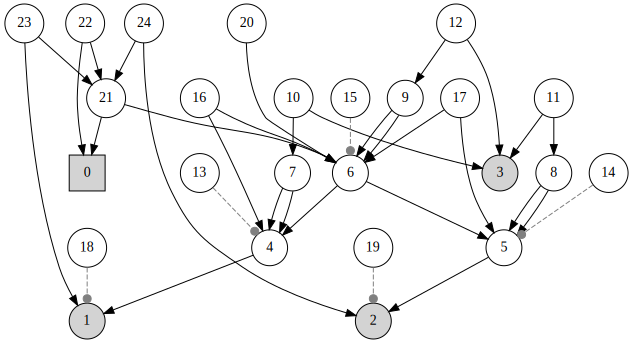

In [5]:
ssst_hgf_control_decision_model = (
    Network()
    .add_nodes(kind="binary-state", n_nodes=1) # Node 0: accuracy (1=success, 0= fail)
    .add_nodes(n_nodes=2)  # Node 1: cognitive capacity, Node 2: cognitive load

    # Trial Type Node
    .add_nodes(n_nodes=1)  # Node 3: Trial Type (0 = Passive, 1 = Go, 2 = Select)

    # Latent states of resource availability and cognitive load
    .add_nodes(value_children=[1])       # Node 4: Latent Resource Availability
    .add_nodes(value_children=[2])       # Node 5: Latent Cognitive Load

    # Decision to allocate control
    .add_nodes(value_children=[4, 5])    # Node 6: Decision to allocate control

    # Autoregressive updates (memory effects)
    .add_nodes(value_children=[4,4])     # Node 7: Prior Resources → Current Resources
    .add_nodes(value_children=[5,5])     # Node 8: Prior Load → Current Load
    .add_nodes(value_children=[6,6])     # Node 9: Prior Control Decision → Current Decision

    # Influence of Trial Type
    .add_nodes(value_children=[7, 3])    # Node 10: Trial Type → Resource Availability
    .add_nodes(value_children=[8, 3])    # Node 11: Trial Type → Cognitive Load
    .add_nodes(value_children=[9, 3])    # Node 12: Trial Type → Decision to Allocate Control

    # Volatility terms for dynamic updates
    .add_nodes(volatility_children=[4])  # Node 13: Resource Availability Volatility
    .add_nodes(volatility_children=[5])  # Node 14: Cognitive Load Volatility
    .add_nodes(volatility_children=[6])  # Node 15: Decision Uncertainty

    # Control Allocation Influences Future Resource Availability and Load
    .add_nodes(value_children=[4, 6])    # Node 16: Control Allocation → Future Resources
    .add_nodes(value_children=[5, 6])    # Node 17: Control Allocation → Future Cognitive Load

    # Uncertainty for Measured Inputs
    .add_nodes(volatility_children=[1])  # Node 18: Observation Noise in Cognitive Capacity
    .add_nodes(volatility_children=[2])  # Node 19: Observation Noise in Cognitive Load

    # Bias Toward/Against Control Allocation
    .add_nodes(value_children=[6])       # Node 20: Bias in Control Allocation

    # Accuracy indicating decision threshold for allocating control successfully
    .add_nodes(value_children=[0,6])     # Node 21: Decision → Control Allocation
    .add_nodes(value_children=[21, 0])   # Node 22: Resources Influence Success
    .add_nodes(value_children=[21, 1])   # Node 23: Cognitive Load Influences Success
    .add_nodes(value_children=[21, 2])   # Node 24: Trial Type Influences Success
)




ssst_hgf_control_decision_model.plot_network()

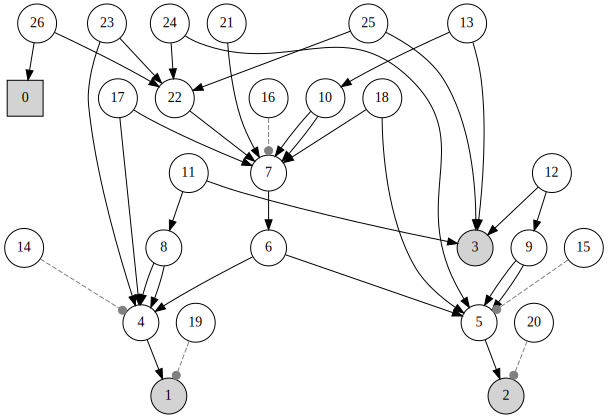

In [6]:
ssst_hgf_control_decision_model = (
    Network()
    .add_nodes(kind="binary-state", n_nodes=1) # Node 0 - data input: accuracy (1=success, 0= fail)
    .add_nodes(n_nodes=2)  # Node 1 - data input : cognitive capacity, Node 2 - data input: cognitive load

    # Trial Type Node
    .add_nodes(n_nodes=1)  # Node 3 - data input: Trial Type (0 = Passive, 1 = Go, 2 = Select)

    # Latent states of resource availability and cognitive load
    .add_nodes(value_children=[1])       # Node 4: Latent Cognitive Capacity
    .add_nodes(value_children=[2])       # Node 5: Latent Cognitive Load

    # Evidence accumulation before deciding whether or not to allocate control
    .add_nodes(value_children=[4, 5])    # Node 6: Information Accumulation

    # Decision to allocate control
    .add_nodes(value_children=[6])       # Node 7: Decision to allocate control

    # Autoregressive updates (memory effects)
    .add_nodes(value_children=[4,4])     # Node 8: Prior Resources → Current Cognitive Capacity
    .add_nodes(value_children=[5,5])     # Node 9: Prior Load → Current Cognitive Load
    .add_nodes(value_children=[7,7])     # Node 10: Prior Control Decision → Current Decision

    # Influence of Trial Type
    .add_nodes(value_children=[8, 3])    # Node 11: Trial Type → Resource Availability
    .add_nodes(value_children=[9, 3])    # Node 12: Trial Type → Cognitive Load
    .add_nodes(value_children=[10, 3])   # Node 13: Trial Type → Control Decision

    # Volatility terms for dynamic updates
    .add_nodes(volatility_children=[4])  # Node 14: Cognitive Capacity Volatility
    .add_nodes(volatility_children=[5])  # Node 15: Cognitive Load Volatility
    .add_nodes(volatility_children=[7])  # Node 16: Decision Uncertainty

    # Control Allocation Influences Future Resource Availability and Load
    .add_nodes(value_children=[4, 7])    # Node 17: Control Allocation → Future Resources
    .add_nodes(value_children=[5, 7])    # Node 18: Control Allocation → Future Cognitive Load

    # Uncertainty for Measured Inputs
    .add_nodes(volatility_children=[1])  # Node 19: Observation Noise in Cognitive Capacity
    .add_nodes(volatility_children=[2])  # Node 20: Observation Noise in Cognitive Load

    # Bias Toward/Against Control Allocation
    .add_nodes(value_children=[7])       # Node 21: Bias in Control Allocation

    # Control Success as Latent Outcome (Separating Decision from Success)
    .add_nodes(value_children=[7])       # Node 22: Control Execution (Intermediate Success State)
    .add_nodes(value_children=[22, 4])   # Node 23: Resources → Success
    .add_nodes(value_children=[22, 5])   # Node 24: Cognitive Load → Success
    .add_nodes(value_children=[22, 3])   # Node 25: Trial Type → Success

    # Accuracy is dependent on control decision execution
    .add_nodes(value_children=[22, 0])      # Node 26: Control Execution → Accuracy
)



ssst_hgf_control_decision_model.plot_network()

Below are the **equations** for the **ssst_hgf_control_decision_model**. Each equation corresponds to the relationships and influences defined in the model's structure.  

---

### **1. Accuracy (Node 0)**  
This binary node represents whether a trial response was correct $ (x_0 = 1) $ or incorrect $ (x_0 = 0) $.  

$  
x_0 \sim \text{Bernoulli}(p_0)  
$  

Where $ p_0 $ is the probability of a correct response, which depends on **control execution**.  

---

### **2. Latent Resource Availability (Node 4)**  
This represents cognitive resources available for control allocation.  

$  
x_4 = f(x_{4,t-1}) + \beta_1 x_3 + \epsilon_4  
$  

Where:  
- $ x_{4,t-1} $ is the prior resource availability.  
- $ x_3 $ (Trial Type) influences resources.  
- $ \beta_1 $ is the trial type influence weight.  
- $ \epsilon_4 \sim \mathcal{N}(0, \sigma_4^2) $ is noise.  

---

### **3. Latent Cognitive Load (Node 5)**  
Cognitive load dynamically updates based on prior load and trial type.  

$  
x_5 = f(x_{5,t-1}) + \beta_2 x_3 + \epsilon_5  
$  

Where:  
- $ x_{5,t-1} $ is prior cognitive load.  
- $ x_3 $ (Trial Type) influences cognitive load.  
- $ \beta_2 $ is the trial type influence weight.  
- $ \epsilon_5 \sim \mathcal{N}(0, \sigma_5^2) $ is noise.  

---

### **4. Information Accumulation (Node 6)**  
Before deciding to allocate control, information is accumulated from resource availability and cognitive load.  

$  
x_6 = g(x_4, x_5) + \epsilon_6  
$  

Where $ g(x_4, x_5) $ is a function integrating **resource availability and cognitive load**.  

---

### **5. Decision to Allocate Control (Node 7)**  
The decision to allocate control is based on information accumulation and trial type.  

$  
x_7 = h(x_6, x_3) + \epsilon_7  
$  

Where:  
- $ x_6 $ (Information Accumulation) influences the control decision.  
- $ x_3 $ (Trial Type) modulates decision-making.  
- $ \epsilon_7 \sim \mathcal{N}(0, \sigma_7^2) $ represents **decision uncertainty**.  

---

### **6. Prior Resource and Load Effects**  
Cognitive resource availability and load update autoregressively.  

$  
x_{4,t} = \alpha_4 x_{4,t-1} + \eta_4  
$  

$  
x_{5,t} = \alpha_5 x_{5,t-1} + \eta_5  
$  

Where:  
- $ \alpha_4, \alpha_5 $ are memory effect parameters.  
- $ \eta_4, \eta_5 \sim \mathcal{N}(0, \sigma^2) $ are noise terms.  

---

### **7. Trial Type Influence on Control Decision**  
Trial type modulates control decision updates.  

$  
x_{7,t} = \alpha_7 x_{7,t-1} + \beta_3 x_3 + \eta_7  
$  

Where:  
- $ \alpha_7 $ is the **prior control decision influence**.  
- $ \beta_3 $ is the weight of **trial type influence**.  
- $ \eta_7 $ is noise.  

---

### **8. Control Execution (Node 22)**  
The success of control allocation depends on resource availability, cognitive load, and trial type.  

$  
x_{22} = k(x_7) + \gamma_1 x_4 + \gamma_2 x_5 + \gamma_3 x_3 + \epsilon_{22}  
$  

Where:  
- $ k(x_7) $ maps **control decision** to execution outcome.  
- $ \gamma_1, \gamma_2, \gamma_3 $ are weights for **resource availability, cognitive load, and trial type influence**.  

---

### **9. Control Execution and Accuracy**  
Accuracy depends on control execution.  

$  
x_0 = \sigma(x_{22})  
$  

Where $ \sigma(x_{22}) $ is a **sigmoid function** mapping control execution to accuracy.  

---

### **10. Volatility Terms**  
Dynamic uncertainty in cognitive load, resource availability, and decision-making.  

$  
v_4 = g_v(x_4) + \epsilon_{v4}  
$  

$  
v_5 = g_v(x_5) + \epsilon_{v5}  
$  

$  
v_7 = g_v(x_7) + \epsilon_{v7}  
$  

Where:  
- $ g_v(x) $ models **volatility dynamics** for each latent variable.  
- $ \epsilon_v $ are Gaussian noise terms.  

---

### **Summary of Nodes and Equations**  

| **Node**        | **Description**                                                  | **Equation** |
|-----------------|------------------------------------------------------------------|-------------|
| **Node 0** $ x_0 $ | Accuracy (Correct/Incorrect)                              | $ x_0 = \sigma(x_{22}) $ |
| **Node 4** $ x_4 $ | Latent Resource Availability                             | $ x_4 = f(x_{4,t-1}) + \beta_1 x_3 + \epsilon_4 $ |
| **Node 5** $ x_5 $ | Latent Cognitive Load                                    | $ x_5 = f(x_{5,t-1}) + \beta_2 x_3 + \epsilon_5 $ |
| **Node 6** $ x_6 $ | Information Accumulation                                 | $ x_6 = g(x_4, x_5) + \epsilon_6 $ |
| **Node 7** $ x_7 $ | Decision to Allocate Control                             | $ x_7 = h(x_6, x_3) + \epsilon_7 $ |
| **Node 22** $ x_{22} $ | Control Execution                                   | $ x_{22} = k(x_7) + \gamma_1 x_4 + \gamma_2 x_5 + \gamma_3 x_3 + \epsilon_{22} $ |
| **Volatility Nodes** | Uncertainty in latent variables                          | $ v_i = g_v(x_i) + \epsilon_{vi} $ |

---

### **Interpretation of Key Nodes**  
#### **1. Latent Resource Availability (Node 4)**  
- **High**: More cognitive resources available → increased control allocation.  
- **Low**: Fewer resources → lower likelihood of control engagement.  

#### **2. Latent Cognitive Load (Node 5)**  
- **High**: Increased cognitive burden → harder to allocate control.  
- **Low**: Lower load → more efficient control allocation.  

#### **3. Information Accumulation (Node 6)**  
- **High**: Strong accumulation → clear decision to allocate control.  
- **Low**: Insufficient evidence → hesitation in control decisions.  

#### **4. Decision to Allocate Control (Node 7)**  
- **High**: Likely to engage cognitive resources for control.  
- **Low**: Control disengagement or failure to activate control.  

#### **5. Control Execution (Node 22)**  
- **High**: Effective engagement of control → increased accuracy.  
- **Low**: Control failure → decreased accuracy.  

#### **6. Accuracy (Node 0)**  
- **High (1.0)**: Successful control execution.  
- **Low (0.0)**: Control failure.  

---

### **Key Takeaways**  
✅ **Resource availability and cognitive load dynamically influence control decisions.**  
✅ **Trial type shapes decision-making and control allocation.**  
✅ **Control execution determines final accuracy.**  


## Adding cognitive reserve
this is to account for baseline capacity and dynamic updates involving increases and decreaes in average cognitive capacity.



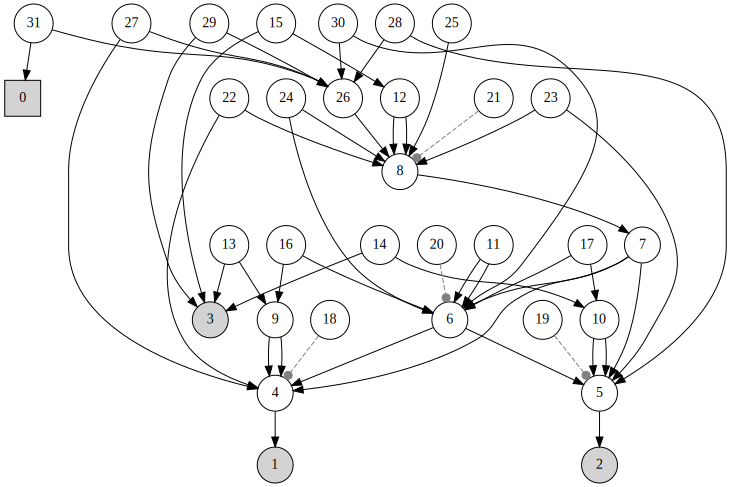

In [8]:
ssst_hgf_control_decision_model = (
    Network()

    # Node 0: Accuracy (1 = success, 0 = failure)
    .add_nodes(kind="binary-state", n_nodes=1)

    # Nodes 1 and 2 - datainput nodes
      # Node 1: Cognitive Capacity (Initialized from computed values)
      # Node 2: Cognitive Load (Initialized from computed values)
    .add_nodes(n_nodes=2)

    # Node 3: Trial Type (0 = Passive, 1 = Go, 2 = Select)
    .add_nodes(n_nodes=1)

    # Latent Resource Availability (Updated dynamically)
    .add_nodes(value_children=[1])  # Node 4: Resource Availability

    # Latent Cognitive Load (Updated dynamically)
    .add_nodes(value_children=[2])  # Node 5: Cognitive Load

    # Latent Cognitive Reserve (Inferred dynamically)
    .add_nodes(value_children=[4, 5])  # Node 6: Cognitive Reserve

    # Evidence Accumulation Before Control Allocation
    .add_nodes(value_children=[4, 5, 6])  # Node 7: Information Accumulation

    # Decision to Allocate Control
    .add_nodes(value_children=[7])  # Node 8: Decision to allocate control

    # Autoregressive Memory Effects
    .add_nodes(value_children=[4, 4])  # Node 9: Prior Resources → Current Resources
    .add_nodes(value_children=[5, 5])  # Node 10: Prior Load → Current Load
    .add_nodes(value_children=[6, 6])  # Node 11: Prior Reserve → Current Reserve
    .add_nodes(value_children=[8, 8])  # Node 12: Prior Control Decision → Current Decision

    # Trial Type Effects on Resource Availability, Cognitive Load, and Control Decisions
    .add_nodes(value_children=[9, 3])  # Node 13: Trial Type → Resource Availability
    .add_nodes(value_children=[10, 3])  # Node 14: Trial Type → Cognitive Load
    .add_nodes(value_children=[12, 3]) # Node 15: Trial Type → Control Decision

    # Cognitive Reserve Effects on Adaptation
    .add_nodes(value_children=[9, 6])  # Node 16: Cognitive Reserve → Resource Adaptation
    .add_nodes(value_children=[10, 6])  # Node 17: Cognitive Reserve → Load Adaptation

    # Volatility Terms for Dynamic Updates
    .add_nodes(volatility_children=[4])  # Node 18: Resource Volatility
    .add_nodes(volatility_children=[5])  # Node 19: Load Volatility
    .add_nodes(volatility_children=[6])  # Node 20: Reserve Volatility
    .add_nodes(volatility_children=[8])  # Node 21: Decision Uncertainty

    # Control Allocation Influences Future Resource Availability and Load
    .add_nodes(value_children=[4, 8])  # Node 22: Control Allocation → Future Resources
    .add_nodes(value_children=[5, 8])  # Node 23: Control Allocation → Future Load
    .add_nodes(value_children=[6, 8])  # Node 24: Control Allocation → Future Reserve

    # Bias in Control Allocation
    .add_nodes(value_children=[8])  # Node 25: Bias in Control Allocation

    # Control Execution & Success
    .add_nodes(value_children=[8])  # Node 26: Control Execution
    .add_nodes(value_children=[26, 4])  # Node 27: Resources → Success
    .add_nodes(value_children=[26, 5])  # Node 28: Cognitive Load → Success
    .add_nodes(value_children=[26, 3])  # Node 29: Trial Type → Success
    .add_nodes(value_children=[26, 6])  # Node 30: Cognitive Reserve → Success

    # Accuracy as an Outcome of Control Execution
    .add_nodes(value_children=[26, 0])  # Node 31: Control Execution → Accuracy
)

# Ensure dynamic updates occur in each trial
# for t in range(num_trials):
#     cognitive_capacity[t] = alpha * cognitive_capacity[t-1] - beta * cognitive_load[t-1] + gamma * trial_type[t] + theta * cognitive_reserve[t] + noise()
#     cognitive_load[t] = delta * cognitive_load[t-1] + eta * trial_type[t] - lambda * cognitive_reserve[t] + noise()
#     cognitive_reserve[t] = rho * cognitive_reserve[t-1] + sigma * trial_type[t] + noise()
#     decision[t] = sigmoid(cognitive_capacity[t] - cognitive_load[t] + cognitive_reserve[t] + trial_type[t] + bias)

ssst_hgf_control_decision_model.plot_network()
